# Analyzing the Impact of Terrorism to Pakistan FDI.

In [ ]:
# Import reqiure libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
%cd drive/MyDrive/

/content/drive/MyDrive


In [ ]:
# Load the dataset into dataframe.
terr_df = pd.read_csv("terrorist.csv")
terr_df.head()

,Entity,Code,Year,"Number of terrorist incidents (GDT, 2018)"
0,Afghanistan,AFG,1973,1
1,Afghanistan,AFG,1979,3
2,Afghanistan,AFG,1987,1
3,Afghanistan,AFG,1988,11
4,Afghanistan,AFG,1989,10


In [ ]:
# Select pakistan country from all.
terr_df = terr_df[terr_df["Entity"] == "Pakistan"]

In [ ]:
# Drop the Entity and Code column, which are not useful in this case.
terr = terr_df.drop(["Entity","Code"],axis=1)
terr.head()

,Year,"Number of terrorist incidents (GDT, 2018)"
2815,1970,1
2816,1974,2
2817,1975,2
2818,1976,3
2819,1978,2


In [ ]:
terr.tail()

,Year,"Number of terrorist incidents (GDT, 2018)"
2853,2013,2215
2854,2014,2151
2855,2015,1243
2856,2016,864
2857,2017,719


In [ ]:
# Now, Load the FDI dataset.
fdi_df = pd.read_csv("fdi.csv",skiprows=[0,1,2,3])
fdi_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.263714e+08,2.506181e+08,-2.877586e+07,2.755127e+07,1.624636e+08,1.359212e+08,-7.522654e+07,1.431161e+08,NaN,NaN
1,Africa Eastern and Southern,AFE,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.153424e+10,2.768142e+10,2.877423e+10,1.684205e+10,9.955493e+09,1.444963e+10,1.468484e+10,1.291341e+10,NaN,NaN
2,Afghanistan,AFG,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.831135e+07,4.297526e+07,1.691466e+08,9.359132e+07,5.153390e+07,1.194351e+08,2.340455e+07,1.297015e+07,NaN,NaN
3,Africa Western and Central,AFW,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.915693e+10,1.659399e+10,1.564134e+10,1.393677e+10,1.766104e+10,1.550176e+10,1.708845e+10,1.723634e+10,NaN,NaN
4,Angola,AGO,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,-7.120017e+09,3.657515e+09,1.002822e+10,-1.795176e+08,-7.397295e+09,-6.456076e+09,-4.098479e+09,-1.866468e+09,NaN,NaN


In [ ]:
# Select pakistan FDI values.
index= 0
for i, val in enumerate(fdi_df["Country Name"]):
  if val == "Pakistan":
    index = i
fdi = fdi_df.iloc[index:index+1]   

In [ ]:
fdi.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 66'],
      dtype='object')

In [ ]:
# Drop unuseful columns.
fdi = fdi.drop(["Country Name","Country Code","Indicator Name","Indicator Code","2021","Unnamed: 66"],axis=1)
fdi

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.326000e+09,859000000.0,1.333000e+09,1.887000e+09,1.673000e+09,2.576000e+09,2.496000e+09,1.737000e+09,2.234000e+09,2.105000e+09


In [ ]:
# Remove columns contaings NaN values.
fdi = fdi.dropna(axis=1)

In [ ]:
fdi.iloc[0][35:48]

2005    2.201000e+09
2006    4.273000e+09
2007    5.590000e+09
2008    5.438000e+09
2009    2.338000e+09
2010    2.022000e+09
2011    1.326000e+09
2012    8.590000e+08
2013    1.333000e+09
2014    1.887000e+09
2015    1.673000e+09
2016    2.576000e+09
2017    2.496000e+09
Name: 184, dtype: float64

In [ ]:
values = []
for i in fdi.columns:
  values.append(fdi[i])

In [ ]:
# Convert the FDI values to array.
values = np.array(values)
values.astype("int64")

array([[  23000000],
       [   1000000],
       [  17000000],
       [  -4000000],
       [   4000000],
       [  25000000],
       [   8220530],
       [  15223204],
       [  32273192],
       [  58254127],
       [  63632992],
       [ 108084748],
       [  63833091],
       [  29457026],
       [  55510169],
       [ 131389252],
       [ 105730331],
       [ 129377643],
       [ 186491557],
       [ 210599917],
       [ 245262963],
       [ 258414487],
       [ 336479857],
       [ 348556957],
       [ 421024638],
       [ 722631560],
       [ 921976182],
       [ 716253125],
       [ 506000000],
       [ 532000000],
       [ 308000000],
       [ 378000000],
       [ 826000000],
       [ 534000000],
       [1118000000],
       [2201000000],
       [4273000000],
       [5590000000],
       [5438000000],
       [2338000000],
       [2022000000],
       [1326000000],
       [ 859000000],
       [1333000000],
       [1887000000],
       [1673000000],
       [2576000000],
       [24960

In [ ]:
# Create a new dataframe with preprocessed data values.
cdf = pd.DataFrame(terr["Year"][30:], columns=["Year"])
cdf["Amount in Billion US($)"] = values[35:48]/1000000000
cdf.describe()

,Year,Amount in Billion US($)
count,13.00000,13.000000
mean,2011.00000,2.616308
std,3.89444,1.527260
min,2005.00000,0.859000
25%,2008.00000,1.673000
50%,2011.00000,2.201000
75%,2014.00000,2.576000
max,2017.00000,5.590000


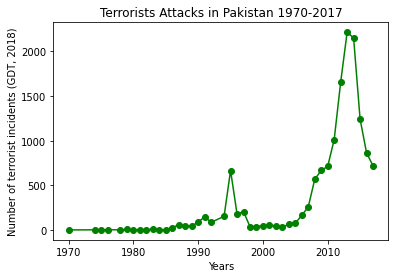

In [ ]:
# Visualize the trend of Terrorist attack in pakistan over the years.
plt.plot(terr["Year"], terr["Number of terrorist incidents (GDT, 2018)"],'go-')
plt.title("Terrorists Attacks in Pakistan 1970-2017")
plt.xlabel("Years")
plt.ylabel("Number of terrorist incidents (GDT, 2018)")
plt.savefig("terroristsAttack.png")
plt.show()

In [ ]:
tdf = terr[30:]
tdf.describe()

,Year,"Number of terrorist incidents (GDT, 2018)"
count,13.00000,13.000000
mean,2011.00000,946.692308
std,3.89444,696.823553
min,2005.00000,77.000000
25%,2008.00000,568.000000
50%,2011.00000,719.000000
75%,2014.00000,1243.000000
max,2017.00000,2215.000000


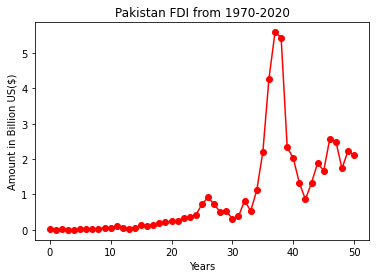

In [ ]:
# Visualize the FDI growth of pakistan over the years.
plt.plot( values/1000000000,'ro-',)
plt.title("Pakistan FDI from 1970-2020")
plt.xlabel("Years")
plt.ylabel("Amount in Billion US($)")
plt.savefig("fdi.png")
plt.show()

### Normal Distribution Test

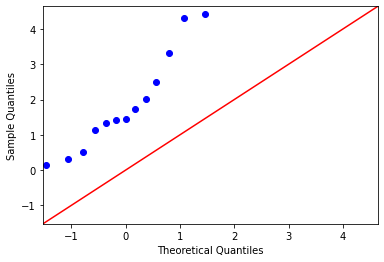

In [ ]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab

# If all points lie on the red 45 degree line, than the distribution is normally distributed.
sm.qqplot(terr["Number of terrorist incidents (GDT, 2018)"][30:].values/500, line='45')
pylab.show()

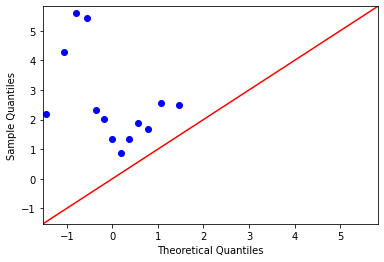

In [ ]:
sm.qqplot(values[35:48]/1000000000, line='45')
pylab.show()

### Spearman Correlation Test

In [ ]:
# Calculate percentge change in number of attacks year by year.
terr["incidentsChange"] = terr["Number of terrorist incidents (GDT, 2018)"].pct_change()

In [ ]:
# Fill the NaN values with zero.
terr["incidentsChange"] = terr["incidentsChange"].fillna(0)

In [ ]:
# Create a dataframe of the values.
df = pd.DataFrame(values)

In [ ]:
df["pctChange"] = df[0].pct_change()
df["pctChange"] = df["pctChange"].fillna(0)
df["pctChange"]

0      0.000000
1     -0.956522
2     16.000000
3     -1.235294
4     -2.000000
5      5.250000
6     -0.671179
7      0.851852
8      1.120000
9      0.805031
10     0.092334
11     0.698565
12    -0.409416
13    -0.538530
14     0.884446
15     1.366940
16    -0.195289
17     0.223657
18     0.441451
19     0.129273
20     0.164592
21     0.053622
22     0.302094
23     0.035892
24     0.207908
25     0.716364
26     0.275859
27    -0.223133
28    -0.293546
29     0.051383
30    -0.421053
31     0.227273
32     1.185185
33    -0.353511
34     1.093633
35     0.968694
36     0.941390
37     0.308214
38    -0.027191
39    -0.570063
40    -0.135158
41    -0.344214
42    -0.352187
43     0.551804
44     0.415604
45    -0.113408
46     0.539749
47    -0.031056
48    -0.304087
49     0.286126
50    -0.057744
Name: pctChange, dtype: float64

In [ ]:
terr

,Year,"Number of terrorist incidents (GDT, 2018)",incidentsChange
2815,1970,1,0.000000
2816,1974,2,1.000000
2817,1975,2,0.000000
2818,1976,3,0.500000
2819,1978,2,-0.333333
2820,1979,7,2.500000
2821,1980,1,-0.857143
2822,1981,4,3.000000
2823,1982,4,0.000000
2824,1983,9,1.250000


In [ ]:
Df = df[34:47]
ter = terr[30:]
print(Df.shape)
print(ter.shape)

(13, 2)
(13, 3)


##Spearman's Correlation

In [ ]:
# Calculate rankings of FDI values and create a new column for that.
Df["Rank"] = Df[0].rank()
Df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,0,pctChange,Rank
34,1.118000e+09,1.093633,2.0
35,2.201000e+09,0.968694,8.0
36,4.273000e+09,0.941390,11.0
37,5.590000e+09,0.308214,13.0
38,5.438000e+09,-0.027191,12.0
39,2.338000e+09,-0.570063,9.0
40,2.022000e+09,-0.135158,7.0
41,1.326000e+09,-0.344214,3.0
42,8.590000e+08,-0.352187,1.0
43,1.333000e+09,0.551804,4.0


In [ ]:
# Calculate rankings of terrorism values and create a new column for that.
ter["Rank"] = ter["Number of terrorist incidents (GDT, 2018)"].rank()
ter.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,"Number of terrorist incidents (GDT, 2018)",incidentsChange,Rank
2845,2005,77,0.149254,1.0
2846,2006,164,1.129870,2.0
2847,2007,260,0.585366,3.0
2848,2008,568,1.184615,4.0
2849,2009,667,0.174296,5.0


In [ ]:
# Calculate spearman correlation througth the formula manually.
d = Df["Rank"].values - ter["Rank"].values
new = pd.DataFrame(terr["Year"][30:],columns=["Year"])
new["FDI in Billion $"] = Df[0]
new.head()

,Year,FDI in Billion $
2845,2005,NaN
2846,2006,NaN
2847,2007,NaN
2848,2008,NaN
2849,2009,NaN


In [ ]:
dSquare = d**2
dSquare

array([  1.,  36.,  64.,  81.,  49.,   9.,   4.,  64., 144.,  64.,  16.,
         9.,   9.])

In [ ]:
# This sum should be zero.
np.sum(d)

0.0

In [ ]:
# Putting the values in the formula.
n = Df.shape[0]
spearmanCorrelation = (1-(6*(np.sum(dSquare)))/(n*(n**2-1)))
spearmanCorrelation

-0.510989010989011

According to the correlation value, due to the increase in terrorism in pakistan, FDI growth decreases.

##Military Expenditure Data Loading

In [ ]:
me = pd.read_csv("militaryExpenditure.csv")
me = me.drop(["Unnamed: 0"],axis=1)
me.columns = ["Year", "Amount in Billion US($)"]
me.head()

,Year,Amount in Billion US($)
0,1960,0.208845
1,1961,0.210105
2,1962,0.200340
3,1963,0.219660
4,1964,0.257880


In [ ]:
dat = me[45:58]
dat.describe()

,Year,Amount in Billion US($)
count,13.00000,13.000000
mean,2011.00000,7.155953
std,3.89444,2.195656
min,2005.00000,4.587117
25%,2008.00000,5.274565
50%,2011.00000,6.954788
75%,2014.00000,8.654923
max,2017.00000,11.461254


In [ ]:
m = me[45:58]

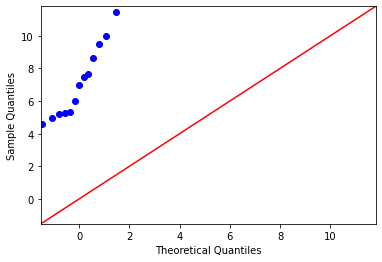

In [ ]:
# Checking the normal distribution.
sm.qqplot(m[], line='45')
pylab.show()

#Graphical Comparison Between FDI and Number of Terrorist Attacks

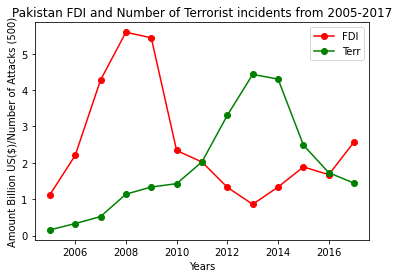

In [ ]:
#plt.figure(figsize=(20,15))
plt.plot(ter["Year"], Df[0]/1000000000, 'ro-',)
plt.plot(ter["Year"], ter["Number of terrorist incidents (GDT, 2018)"]/500,'go-')
plt.legend(['FDI','Terr'])
plt.title("Pakistan FDI and Number of Terrorist incidents from 2005-2017")
plt.xlabel("Years")
plt.ylabel("Amount Billion US($)/Number of Attacks (500)")
plt.savefig("fdiTerrorist(2005-2017).png")
plt.show()

As, we can see graphically as well, due to the increase in terrorism, FDI growth decreased.

##Graphical comparison between military expenditure and terrorism

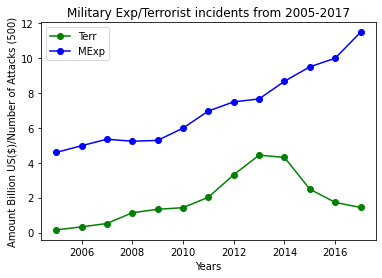

In [ ]:
#plt.figure(figsize=(20,15))
plt.plot(ter["Year"], ter["Number of terrorist incidents (GDT, 2018)"]/500,'go-')
plt.plot(m["years"], m["Amount"], 'bo-',)
plt.legend(['Terr','MExp'])
plt.title("Military Exp/Terrorist incidents from 2005-2017")
plt.xlabel("Years")
plt.ylabel("Amount Billion US($)/Number of Attacks (500)")
plt.savefig("MExpTerrorist(2005-2017).png")
plt.show()

So, here it is clear that, due to the increase in the number of terrorist attack Pakistan Army started more to invest in military expenditures.

##Graphical comparison between military expenditure, FDI, and terrorism

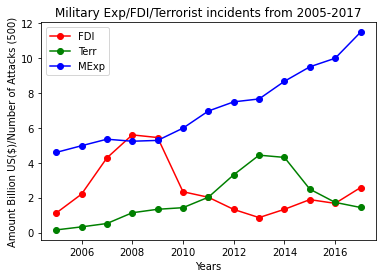

In [ ]:
#plt.figure(figsize=(20,15))
plt.plot(ter["Year"], Df[0]/1000000000, 'ro-',)
plt.plot(ter["Year"], ter["Number of terrorist incidents (GDT, 2018)"]/500,'go-')
plt.plot(m["years"], m["Amount"], 'bo-',)
plt.legend(['FDI','Terr','MExp'])
plt.title("Military Exp/FDI/Terrorist incidents from 2005-2017")
plt.xlabel("Years")
plt.ylabel("Amount Billion US($)/Number of Attacks (500)")
plt.savefig("MExpFdiTerrorist(2005-2017).png")
plt.show()